In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp

import warnings  
with warnings.catch_warnings():  
    warnings.filterwarnings("ignore",category=FutureWarning)
    import tensorflow as tf
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
    from tensorflow.keras.models import Model


np.random.seed(42)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

num_classes=10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [2]:
modelMaxPool = Sequential()
modelMaxPool.add(Conv2D(16, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu', padding='same'))
modelMaxPool.add(MaxPooling2D(pool_size=(2, 2)))

modelMaxPool.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
modelMaxPool.add(MaxPooling2D(pool_size=(2, 2)))


modelMaxPool.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
modelMaxPool.add(MaxPooling2D())

modelMaxPool.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
modelMaxPool.add(GlobalAveragePooling2D())
modelMaxPool.add(Dense(10, activation='softmax'))

modelMaxPool.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

In [3]:
modelMaxPool.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
modelMaxPool.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), shuffle=True, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 470us/sample - loss: 0.2296 - accuracy: 0.9268 - val_loss: 0.0547 - val_accuracy: 0.9807
Epoch 2/5
60000/60000 [==============================] - 28s 460us/sample - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.0502 - val_accuracy: 0.9823
Epoch 3/5
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0352 - val_accuracy: 0.9882
Epoch 4/5
60000/60000 [==============================] - 32s 530us/sample - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0284 - val_accuracy: 0.9908
Epoch 5/5
60000/60000 [==============================] - 28s 465us/sample - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0273 - val_accuracy: 0.9907


In [4]:
gap_weights = modelMaxPool.layers[-1].get_weights()[0]
gap_weights.shape

(128, 10)

In [5]:
cnnModel = Model(inputs=modelMaxPool.input, outputs=(modelMaxPool.layers[-3].output, modelMaxPool.layers[-1].output))
features, results = cnnModel.predict(X_test)
features.shape

(10000, 3, 3, 128)

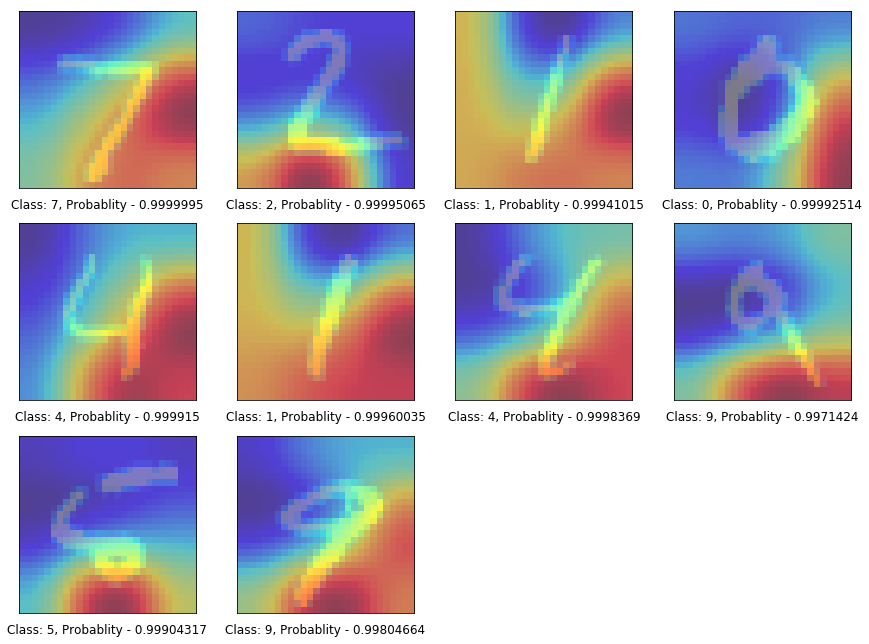

In [7]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
for idx in range(10):
    plt.subplot(4, 4, idx+1)
    featuresForOneImg = features[idx,:, :, :]
    heightRoomout = X_train.shape[1]/featuresForOneImg.shape[0]
    widthRoomout = X_train.shape[2]/featuresForOneImg.shape[1]
    
    camFeatures = sp.ndimage.zoom(featuresForOneImg, (heightRoomout, widthRoomout, 1), order=2)
    pred = np.argmax(results[idx])
    
    camWeights = gap_weights[:, pred]
    camOutput = np.dot(camFeatures, camWeights)
    
    buf = 'Class: '+str(pred)+', Probablity - '+str(results[idx][pred])
    plt.title(buf, y=-0.15)
    plt.imshow(np.squeeze(X_test[idx], -1), alpha=0.5)
    plt.imshow(camOutput, cmap='jet', alpha=0.5)
    plt.xticks([])
    plt.yticks([])

In [8]:
model = Sequential()
model.add(Conv2D(16, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 98,442
Trainable params: 98,442
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), shuffle=True, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 355s 6ms/sample - loss: 0.7576 - accuracy: 0.7477 - val_loss: 0.2343 - val_accuracy: 0.9361
Epoch 2/5
60000/60000 [==============================] - 351s 6ms/sample - loss: 0.2309 - accuracy: 0.9325 - val_loss: 0.2043 - val_accuracy: 0.9402
Epoch 3/5
60000/60000 [==============================] - 351s 6ms/sample - loss: 0.1625 - accuracy: 0.9531 - val_loss: 0.1364 - val_accuracy: 0.9592
Epoch 4/5
60000/60000 [==============================] - 353s 6ms/sample - loss: 0.1324 - accuracy: 0.9612 - val_loss: 0.0851 - val_accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 352s 6ms/sample - loss: 0.1053 - accuracy: 0.9687 - val_loss: 0.0801 - val_accuracy: 0.9751


In [10]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(128, 10)

In [11]:
cnnModel = Model(inputs=model.input, outputs=(model.layers[-3].output, model.layers[-1].output))
features, results = cnnModel.predict(X_test)
features.shape

(10000, 28, 28, 128)

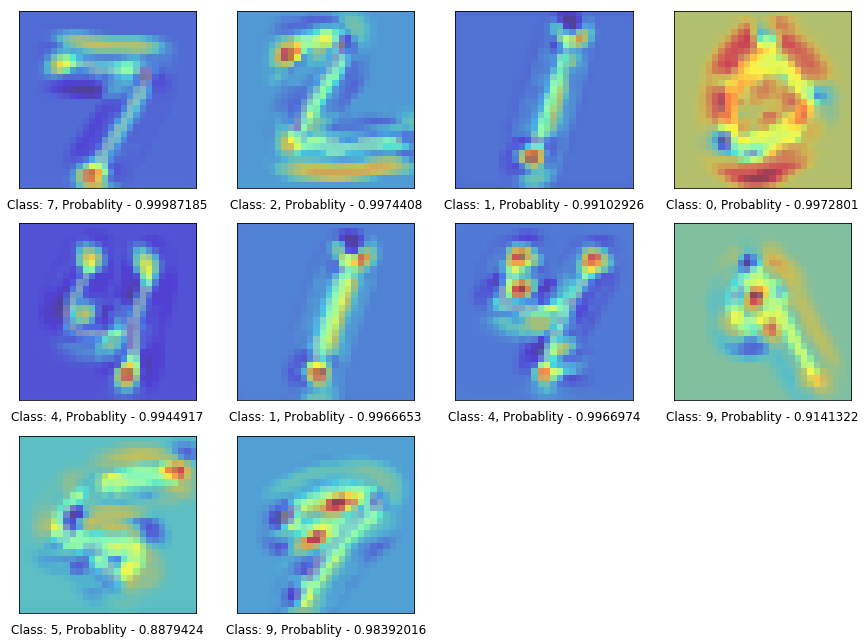

In [12]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
for idx in range(10):
    plt.subplot(4, 4, idx+1)
    featuresForOneImg = features[idx,:, :, :]
    heightRoomout = X_train.shape[1]/featuresForOneImg.shape[0]
    widthRoomout = X_train.shape[2]/featuresForOneImg.shape[1]
    
#     camFeatures = sp.ndimage.zoom(featuresForOneImg, (heightRoomout, widthRoomout, 1), order=2)
    pred = np.argmax(results[idx])
    camFeatures=featuresForOneImg
    
    camWeights = gap_weights[:, pred]
    camOutput = np.dot(camFeatures, camWeights)
    
    buf = 'Class: '+str(pred)+', Probablity - '+str(results[idx][pred])
    plt.title(buf, y=-0.15)
    plt.imshow(np.squeeze(X_test[idx], -1), alpha=0.5)
    plt.imshow(camOutput, cmap='jet', alpha=0.5)
    plt.xticks([])
    plt.yticks([])